In [1]:
import cv2

In [2]:
import os
#import glob
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cv2.__version__

'4.4.0'

In [4]:
DATA_DIR = "./data"

In [5]:
os.path.exists(DATA_DIR)

True

## Reading , writing and displaying an image

In [11]:
img = cv2.imread('./data/lena.jpg',1) # 0 for grayscale, 1 for RBG, -1 for as it is with alpha channel

In [12]:
img.shape

(512, 512, 3)

## Drawing geometric shapes and putting text on an image

In [49]:
img = cv2.line(img,(0,0),(256,256),(0,0,255),5) # R, G ,B
img = cv2.arrowedLine(img,(0,255),(255,255),(255,0,0),5)
img = cv2.rectangle(img,(384,0),(510,128),(255,0,0),5)# -1 to fill the shape with the color
font = cv2.FONT_HERSHEY_COMPLEX
img = cv2.putText(img,"This is Lena",(10,50),font,1,(255,255,255),5,cv2.LINE_AA)
#cv2.polylines
#cv2.ellipse

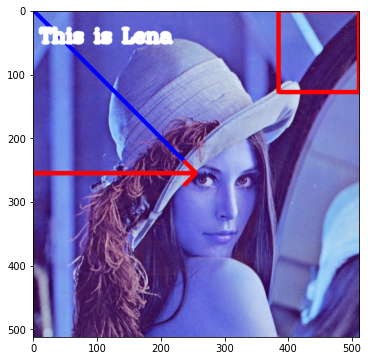

In [50]:
plt.figure(figsize=(6,6))
plt.imshow(img)

In [9]:
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

In [53]:
numpy_img = np.zeros([512,512,3],np.uint8)

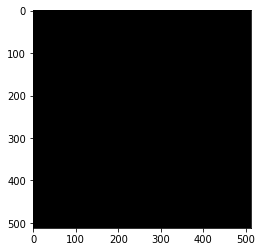

In [55]:
plt.imshow(numpy_img)

## Setting camera parameters

In [8]:
import datetime

In [58]:
cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

720.0
1280.0


In [62]:
#cap = cv2.VideoCapture(0)
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        font = cv2.FONT_HERSHEY_COMPLEX
        #text = "Width : {} , Height : {}".format(cap.get(3),cap.get(4))
        text = datetime.datetime.now()
        frame = cv2.putText(frame,str(text),(10,50),font,1,(0,255,255),2,cv2.LINE_AA)
        #cv2.imshow('frame',gray)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

In [59]:
# cap.release()
# cv2.destroyAllWindows()

## Handling mouse events!

In [10]:
print([e for e in dir(cv2) if 'EVENT' in e])

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [ ]:
# callback function for mouse event!
def click_event(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        #font = cv2.FONT_HERSHEY_COMPLEX
        #text = str(x) + ', ' + str(y)
        #cv2.putText(img,text,(x,y),font,0.5,(255,255,0),2)
        
        # to draw line between clicked points
        cv2.circle(img,(x,y),3,(0,255,0),-1) # -1 for filled circle
        points.append((x,y))
        if len(points) >= 2:
            cv2.line(img,points[-1],points[-2],(255,0,0),5)
        cv2.imshow('image',img)

points =[]
img = np.zeros([512,512,3],np.uint8)
cv2.imshow('image',img)
cv2.setMouseCallback('image',click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# More mouse event examples..
def click_event_one(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[x,y,2]
        green = img[x,y,1]
        red = img[x,y,0]
        cv2.circle(img,(x,y),3,(255,0,0),-1)
        my_image = np.zeros([256,256,3],np.uint8)
        my_image[:]=[red,green,blue]
        cv2.imshow('myimage',my_image)
img = cv2.imread('./data/lena.jpg')
cv2.imshow('image',img)
cv2.setMouseCallback('image',click_event_one)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
!pwd

/Users/shwetangmishra/Desktop/all_data/vision/notebooks


In [14]:
!ls

Learn_openCV.ipynb data               vision_related


## Split, merge, resize, add etc...

In [15]:
# Basic arithmetic operations on images 
img = cv2.imread('./data/lena.jpg',0)

In [19]:
img.shape, img.dtype, img.size, 512*512

((512, 512), dtype('uint8'), 262144, 262144)

In [20]:
img_rgb_lena = cv2.imread('./data/lena.jpg',1)
img_rgb_lena.shape

(512, 512, 3)

In [21]:
r,b,g = cv2.split(img_rgb_lena)
r.shape,b.shape,g.shape

((512, 512), (512, 512), (512, 512))

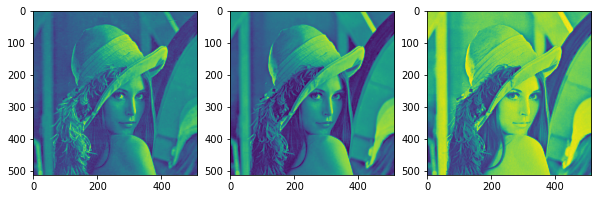

In [23]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(r)
plt.subplot(1,3,2)
plt.imshow(b)
plt.subplot(1,3,3)
plt.imshow(g)

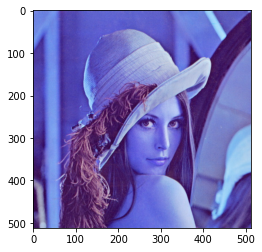

In [29]:
merged_img = cv2.merge((r,b,g))
plt.imshow(merged_img)

In [52]:
# REGION OF INTEREST , ROI OF AN IMAGE..
messi = cv2.imread('./data/messi5.jpg')
ball = messi[280:340,330:390,:]

In [53]:
messi.shape, ball.shape

((342, 548, 3), (60, 60, 3))

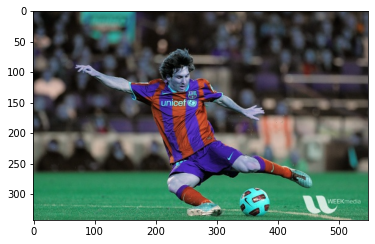

In [54]:
plt.imshow(messi)

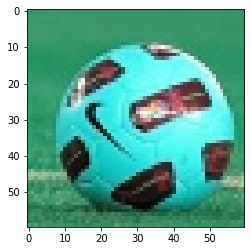

In [55]:
plt.imshow(ball)

In [56]:
messi[273:333,100:160] = ball

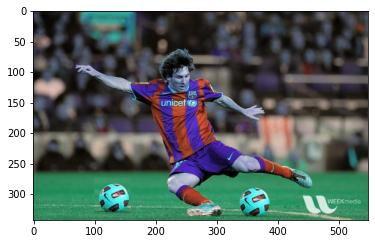

In [57]:
plt.imshow(messi)

In [58]:
img2 = cv2.imread("./data/opencv-logo.png")

(512, 512, 3)
(512, 512, 3) (512, 512, 3)


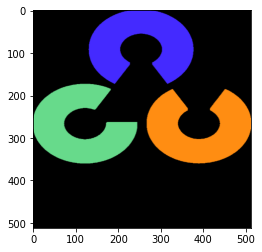

In [66]:
plt.imshow(img2)
print(img2.shape)
img2 = cv2.resize(img2,(512,512))
messi = cv2.resize(messi,(512,512))
print(img2.shape,messi.shape)

In [78]:
dst_img = cv2.add(messi,img2)
print(dst_img.shape)
dst_weighted = cv2.addWeighted(messi,0.5,img2,0.5,0) # adds images in weighted manner

(512, 512, 3)


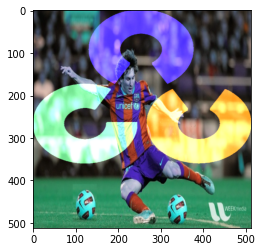

In [79]:
plt.imshow(dst_img);

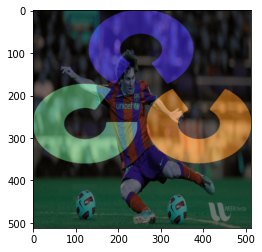

In [81]:
plt.figure(figsize=(4,4))
plt.imshow(dst_weighted)

## BITWISE OPERATIONS - and, or, not,xor !!!

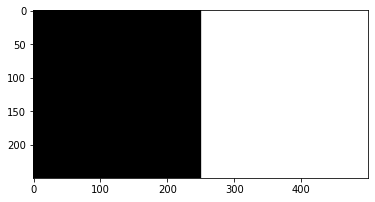

In [126]:
# Bitwise operations are very useful while working with masks.
# image1 = np.zeros((256,256,3))
# image1[:,:125,:] = 255
# plt.imshow(image1)
# image1.shape

image1 = np.full((250, 500, 3), 255, dtype=np.uint8)
image1 = cv2.rectangle(image1, (0, 0), (250, 250), (0, 0, 0), -1)
plt.imshow(image1)

(250, 500, 3)

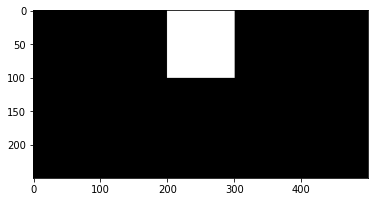

In [128]:
image2 = np.zeros((250,500,3),np.uint8)
image2 = cv2.rectangle(image2,(200,0),(300,100),(255,255,255),-1)
plt.imshow(image2)
image2.shape

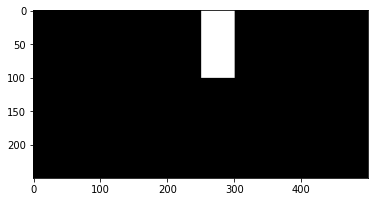

In [129]:
#bitwise_anded = cv2.bitwise_and(cv2.resize(image2,(256,256)),cv2.resize(image1,(256,256)))
#plt.imshow(bitwise_anded)

image3 = cv2.bitwise_and(image1,image2)
plt.imshow(image3)

In [ ]:
# bitwise or, bitwise xor,bitwise not!!

In [7]:
img_lena = cv2.imread("./data/lena.jpg")
print(img_lena.shape)
!pwd

(512, 512, 3)
/Users/shwetangmishra/Desktop/all_data/vision/notebooks


In [ ]:
# How to add trackbar?
# Useful when we want to change a value in the image dynamically at runtime.
# black_img = np.zeros((300,512,3),np.uint8)
cv2.namedWindow('image')


img_lena = cv2.imread("./data/lena.jpg")

def nothing(x):
    print(x)

# CREATE SWITCH !    

switch = '0: off \n 1: on'
cv2.createTrackbar(switch,'image',0,1,nothing) # Switch 0-1 trackbar

# cv2.createTrackbar('R','image',0,255,nothing)
# cv2.createTrackbar('B','image',0,255,nothing)
# cv2.createTrackbar('G','image',0,255,nothing)

cv2.createTrackbar('CP','image',10,400,nothing) # Current position trackbar

while(True):
    #cv2.imshow('image',black_img)
    
    cv2.imshow('image',img_lena)
    trackbar_pos = cv2.getTrackbarPos('CP','image')
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_lena,str(trackbar_pos),(150,150),font,4,(255,0,0))
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

        
#     r = cv2.getTrackbarPos('R','image')
#     g = cv2.getTrackbarPos('G','image')
#     b = cv2.getTrackbarPos('B','image')
    
#     if s == 0:
#         black_img[:] = 0
#     else:
#         black_img[:] = [r,g,b]

    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        pass
    else:
        cv2.cvtColor(img_lena,cv2.COLOR_BGR2GRAY)
    
    img = cv2.imshow('image',img_lena)
    
cv2.destroyAllWindows()

## HSV